In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Exploratory Data Analysis of Datasets.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
gender_data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
df_gender = pd.DataFrame(gender_data)
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)


Number of passengers who survived: 152
Number of passengers who did not survive: 266


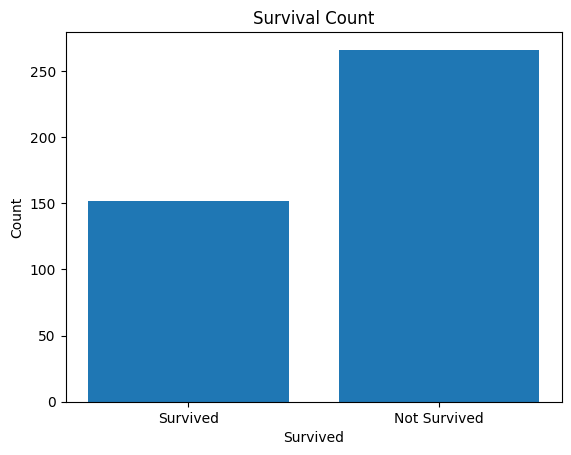

In [21]:
survived_count = df_gender[df_gender["Survived"] == 1]["Survived"].count()
not_survived_count = df_gender[df_gender["Survived"] == 0]["Survived"].count()

print("Number of passengers who survived:", survived_count)
print("Number of passengers who did not survive:", not_survived_count)

plt.bar(["Survived", "Not Survived"], [survived_count, not_survived_count])
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count")
plt.show()


Passenger count by class:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Survived count by class:
Pclass
1    136
3    119
2     87
Name: count, dtype: int64


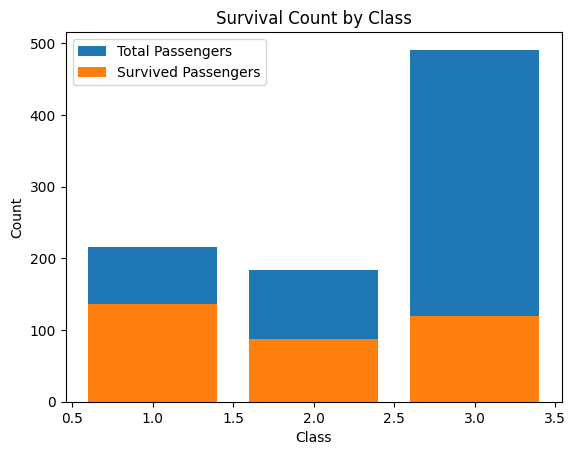

In [22]:
class_counts = df_train["Pclass"].value_counts()
survived_counts = df_train[df_train["Survived"] == 1]["Pclass"].value_counts()

print("Passenger count by class:")
print(class_counts)
print("\nSurvived count by class:")
print(survived_counts)

plt.bar(class_counts.index, class_counts.values, label="Total Passengers")
plt.bar(survived_counts.index, survived_counts.values, label="Survived Passengers")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Survival Count by Class")
plt.legend()
plt.show()

Passenger count by sex:
Sex
male      577
female    314
Name: count, dtype: int64

Survived count by sex:
Sex
female    233
male      109
Name: count, dtype: int64


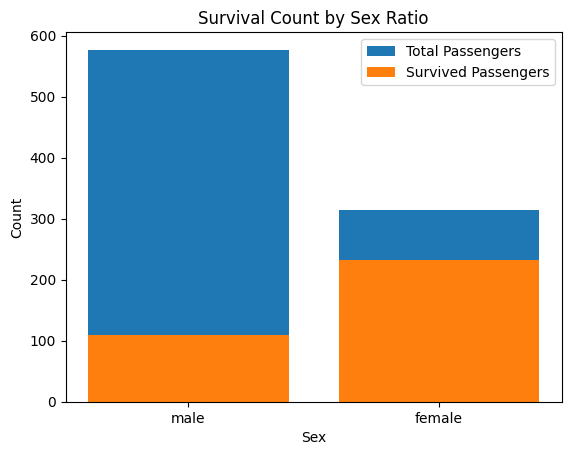

In [23]:
class_counts = df_train["Sex"].value_counts()

survived_counts = df_train[df_train["Survived"] == 1]["Sex"].value_counts()

print("Passenger count by sex:")
print(class_counts)
print("\nSurvived count by sex:")
print(survived_counts)
# Plot the data
plt.bar(class_counts.index, class_counts.values, label="Total Passengers")
plt.bar(survived_counts.index, survived_counts.values, label="Survived Passengers")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Count by Sex Ratio")
plt.legend()
plt.show()


Survived count by age group:
AgeGroup
0-18      61
19-30     95
31-50    107
51+       27
Name: count, dtype: int64


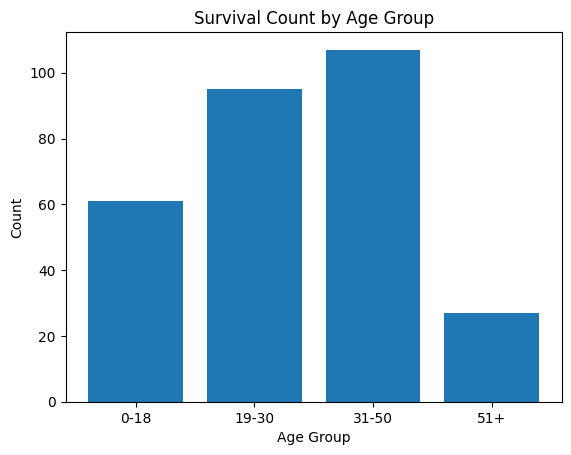

In [24]:
age_bins = [0, 18, 30, 50, 100]  # age group boundaries
age_labels = ["0-18", "19-30", "31-50", "51+"]  # labels for the age groups
df_train["AgeGroup"] = pd.cut(df_train["Age"], bins=age_bins, labels=age_labels, right=False)
survived_counts = df_train[df_train["Survived"] == 1]["AgeGroup"].value_counts().sort_index()
print("Survived count by age group:")
print(survived_counts)
plt.bar(survived_counts.index, survived_counts.values)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Survival Count by Age Group")
plt.show()


/tmp/ipykernel_26/2573815701.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_counts = df_train[df_train["Survived"] == 1].groupby(["AgeGroup", "Sex"]).size().unstack().fillna(0)


Survived count by age group and sex:
Sex       female  male
AgeGroup              
0-18          38    23
19-30         67    28
31-50         72    35
51+           20     7


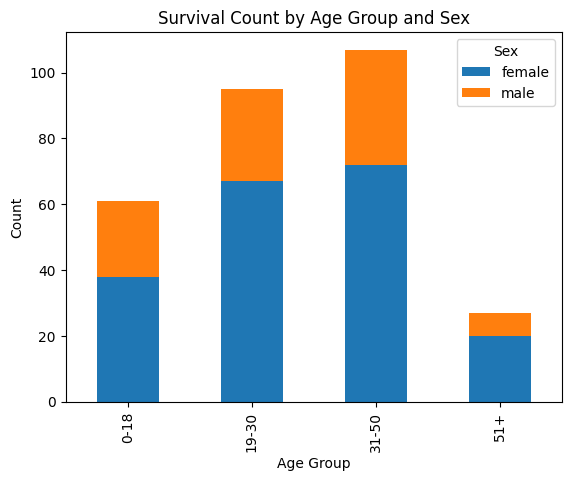

In [25]:
age_bins = [0, 18, 30, 50, 100]  # age group boundaries
age_labels = ["0-18", "19-30", "31-50", "51+"]  # labels for the age groups

df_train["AgeGroup"] = pd.cut(df_train["Age"], bins=age_bins, labels=age_labels, right=False)

survived_counts = df_train[df_train["Survived"] == 1].groupby(["AgeGroup", "Sex"]).size().unstack().fillna(0)

print("Survived count by age group and sex:")
print(survived_counts)


survived_counts.plot(kind="bar", stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Survival Count by Age Group and Sex")
plt.legend(title="Sex")
plt.show()

/tmp/ipykernel_26/1294292350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Sex'] = selected_data['Sex'].map({'female': 0, 'male': 1})
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt

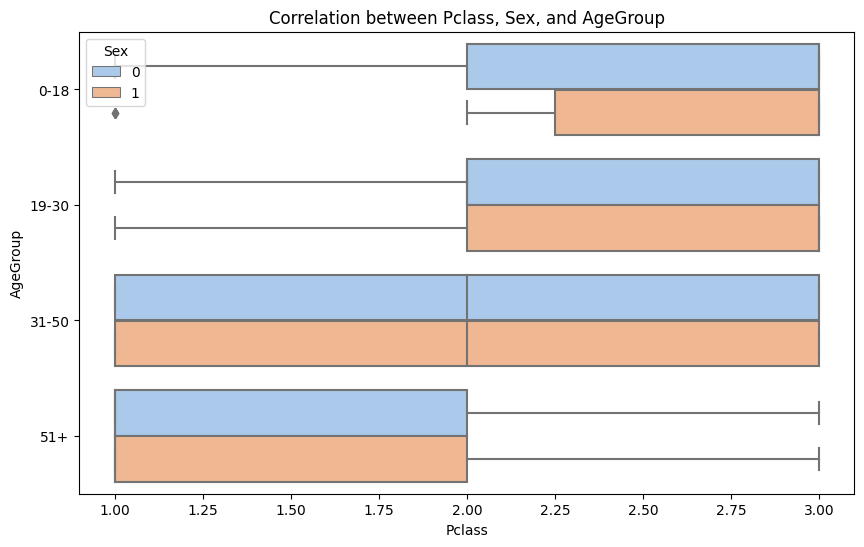

In [26]:
import seaborn as sns

selected_columns = ['Pclass', 'Sex', 'AgeGroup']

selected_data = df_train[selected_columns]

selected_data['Sex'] = selected_data['Sex'].map({'female': 0, 'male': 1})



plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_data, x='Pclass', y='AgeGroup', hue='Sex', palette='pastel')
plt.title('Correlation between Pclass, Sex, and AgeGroup')
plt.show()

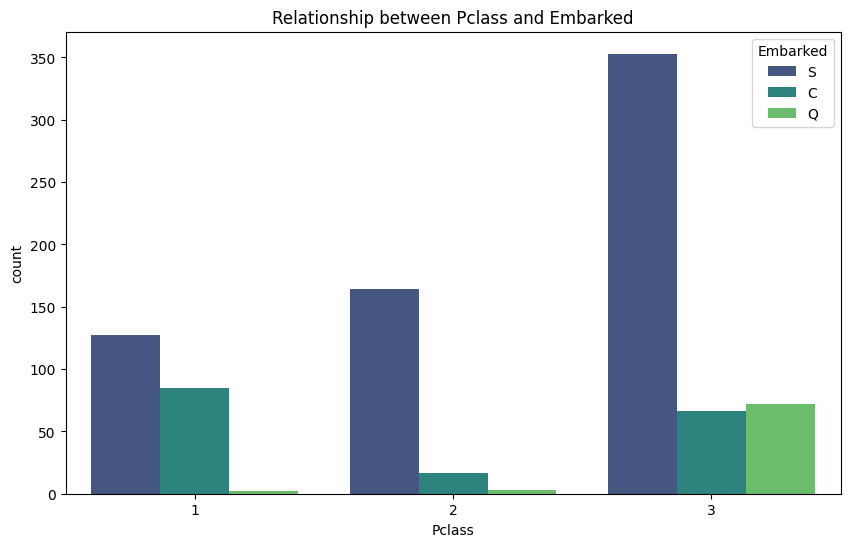

Count of survivors for different combinations of Pclass and Embarked:
   Pclass Embarked  Survived
0       1        C        59
1       1        Q         1
2       1        S        74
3       2        C         9
4       2        Q         2
5       2        S        76
6       3        C        25
7       3        Q        27
8       3        S        67


In [27]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Pclass', hue='Embarked', palette='viridis')
plt.title('Relationship between Pclass and Embarked')
plt.show()

survived_counts = df_train.groupby(['Pclass', 'Embarked'])['Survived'].sum().reset_index()
print("Count of survivors for different combinations of Pclass and Embarked:")
print(survived_counts)

## Training the Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Confusion Matrix:
[[92 13]
 [28 46]]
Accuracy: 0.770949720670391


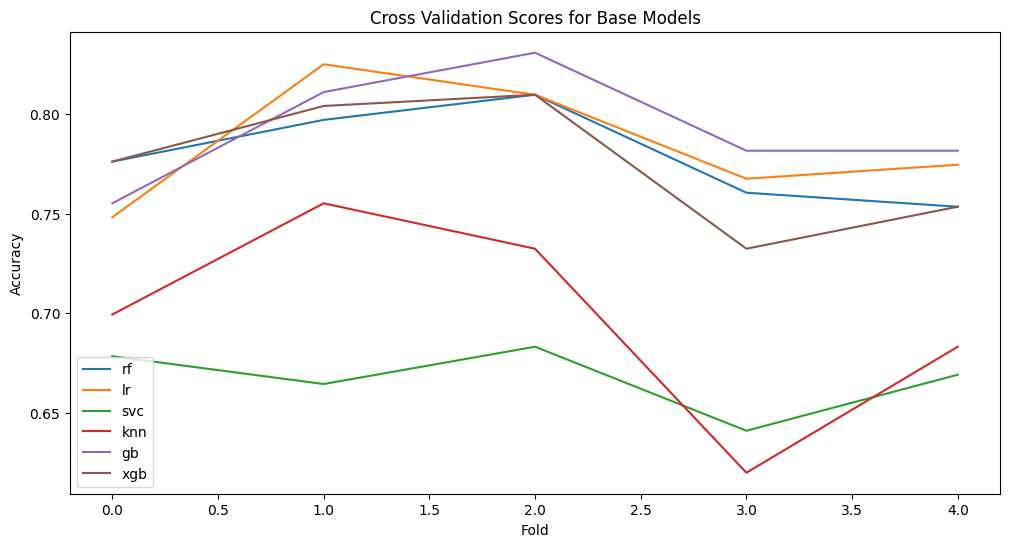

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# Feature Engineering
# Example: Creating a 'FamilySize' feature
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

# Handling missing values using median for continuous variables
imputer = SimpleImputer(strategy='median')
df_train[['Age', 'Fare']] = imputer.fit_transform(df_train[['Age', 'Fare']])
df_test[['Age', 'Fare']] = imputer.transform(df_test[['Age', 'Fare']])

# Encoding categorical variables
label_encoder = LabelEncoder()
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_test['Sex'] = label_encoder.transform(df_test['Sex'])

# Selecting features using Random Forest importance
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
X = df_train[features]
y = df_train['Survived']

# Train-test split for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Feature Selection using Random Forest importance
feature_selector = SelectFromModel(rf_classifier)
feature_selector.fit(X_train, y_train)
selected_features = X_train.columns[feature_selector.get_support()]
X_train_selected = feature_selector.transform(X_train)
X_val_selected = feature_selector.transform(X_val)

# Multiple Algorithms
models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

# Voting Classifier (Ensemble Method)
voting_classifier = VotingClassifier(estimators=models, voting='soft')

# Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'lr__C': [0.1, 1, 10],
    'svc__C': [0.1, 1, 10],
    'knn__n_neighbors': [3, 5, 7],
    'gb__n_estimators': [50, 100, 200],
    'xgb__n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(voting_classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Confusion Matrix
y_val_pred = grid_search.predict(X_val_selected)
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Show the accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", accuracy)

# Plot the accuracy and loss data chart (for each base model in the ensemble)
plt.figure(figsize=(12, 6))
for model_name, model in grid_search.best_estimator_.named_estimators_.items():
    scores = cross_val_score(model, X_train_selected, y_train, cv=cv, scoring='accuracy')
    plt.plot(scores, label=model_name)

plt.title('Cross Validation Scores for Base Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Note: This example focuses on combining multiple algorithms into a Voting Classifier for an ensemble approach.
# You can further refine this code based on your specific needs and dataset characteristics.


## Pre-Processing of Data

In [28]:
df_train.drop(['PassengerId','Name','Ticket','Cabin','AgeGroup'],inplace=True,axis=1)

In [29]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [30]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data Encoding

In [33]:
le_Sex=LabelEncoder()
df_train['Sex']=le_Sex.fit_transform(df_train['Sex'])

le_Embarked=LabelEncoder()
df_train['Embarked']=le_Embarked.fit_transform(df_train['Embarked'])

In [35]:
y=df_train['Survived']
x=df_train.drop('Survived',axis=1)

In [36]:
std=StandardScaler()
df_scaled = std.fit_transform(x.to_numpy())
x = pd.DataFrame(df_scaled, columns=x.columns.values)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [40]:
print(f'Size of x_train:{x_train.shape}')
print(f'Size of y_train:{y_train.shape}')
print(f'Size of x_val:{x_test.shape}')
print(f'Size of y_val:{y_test.shape}')

Size of x_train:(623, 7)
Size of y_train:(623,)
Size of x_val:(268, 7)
Size of y_val:(268,)


In [41]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
print(f'Training Accuracy Score: {rfc.score(x_train,y_train)*100}')
print(f'Testing Accuracy Score: {rfc.score(x_test,y_test)*100}')

Training Accuracy Score: 98.07383627608347
Testing Accuracy Score: 83.95522388059702



 Training Confusion Matrix: 



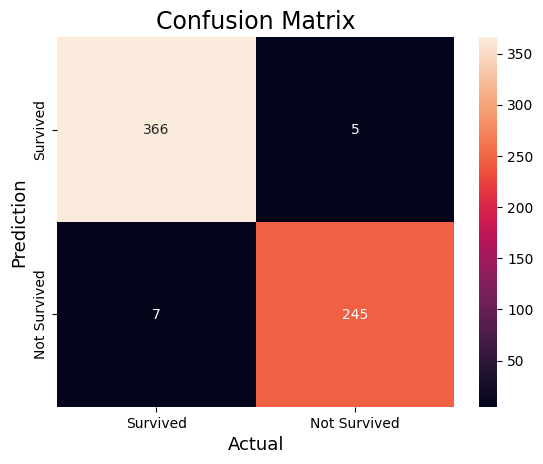

In [44]:
print('\n Training Confusion Matrix: \n')
cm=confusion_matrix(y_train,rfc.predict(x_train))

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


 Validation Confusion Matrix: 



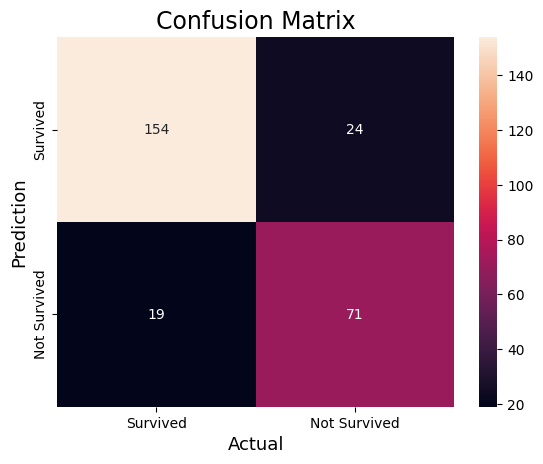

In [45]:
print('\n Validation Confusion Matrix: \n')
cm=confusion_matrix(y_test,rfc.predict(x_test))

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [54]:
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [58]:
from sklearn.preprocessing import LabelEncoder


le_Sex = LabelEncoder()
le_Embarked = LabelEncoder()

# Handle missing values or non-numeric values before label encoding
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

# Fit and transform using label encoder
df_test['Sex'] = le_Sex.fit_transform(df_test['Sex'])
df_test['Embarked'] = le_Embarked.fit_transform(df_test['Embarked'])


In [71]:
y_pred=rfc.predict(df_test)
y_pred


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
pred=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
pred['Survived']=y_pred

In [73]:
pred.to_csv('/kaggle/working/gender_submission.csv',index=False)